In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def count_collisions(array1, array2, threshold=3):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        threshold: float, distance below which a collision is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    # Compute pairwise distances along the trajectory (n_traj, horizon)
    distances = np.linalg.norm(array1 - array2, axis=2)

    # print(distances)

    # Check where distance is below threshold
    collision_mask = distances < threshold  # shape: (n_traj, horizon)

    # Count how many trajectories have at least one collision
    num_colliding_trajectories = np.sum(np.any(collision_mask, axis=1))

    return num_colliding_trajectories

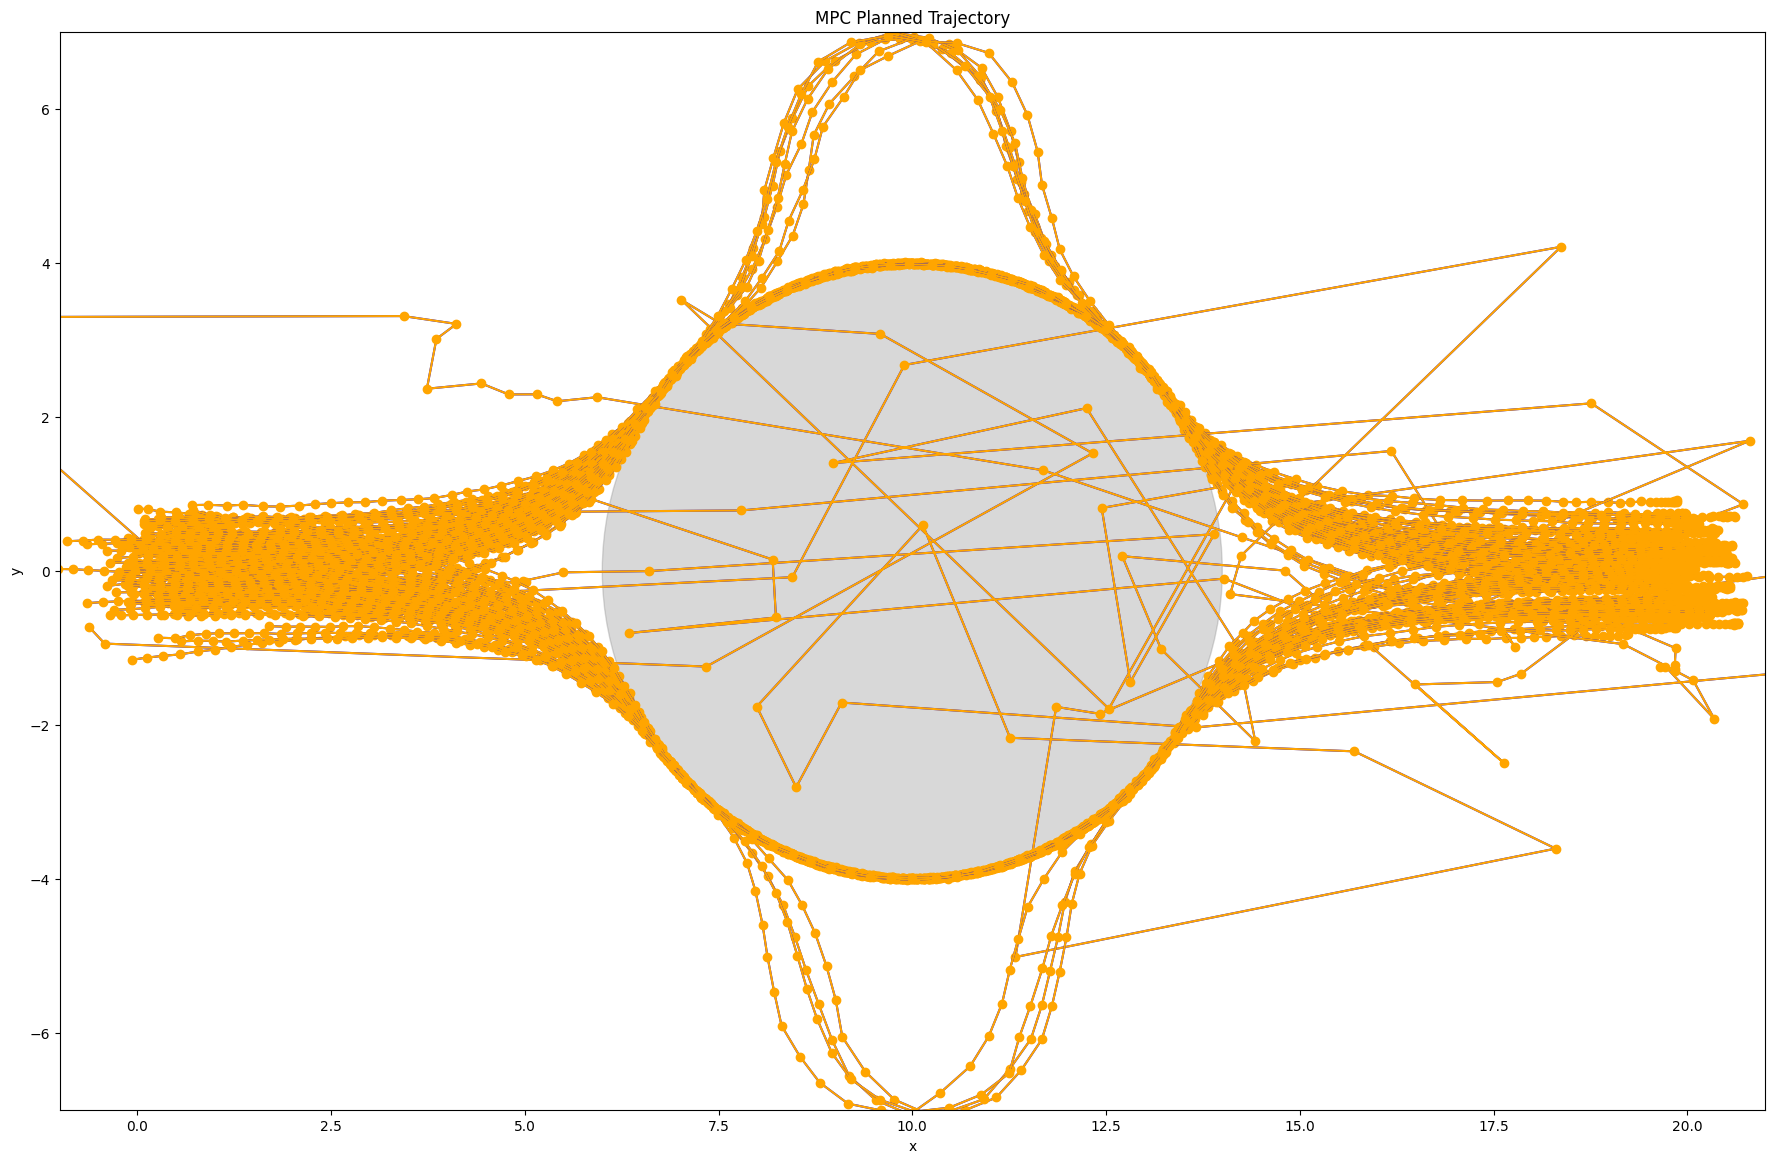

In [8]:
plt.figure(figsize=(22, 14))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("data/splice_mpc_trajs/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()
    

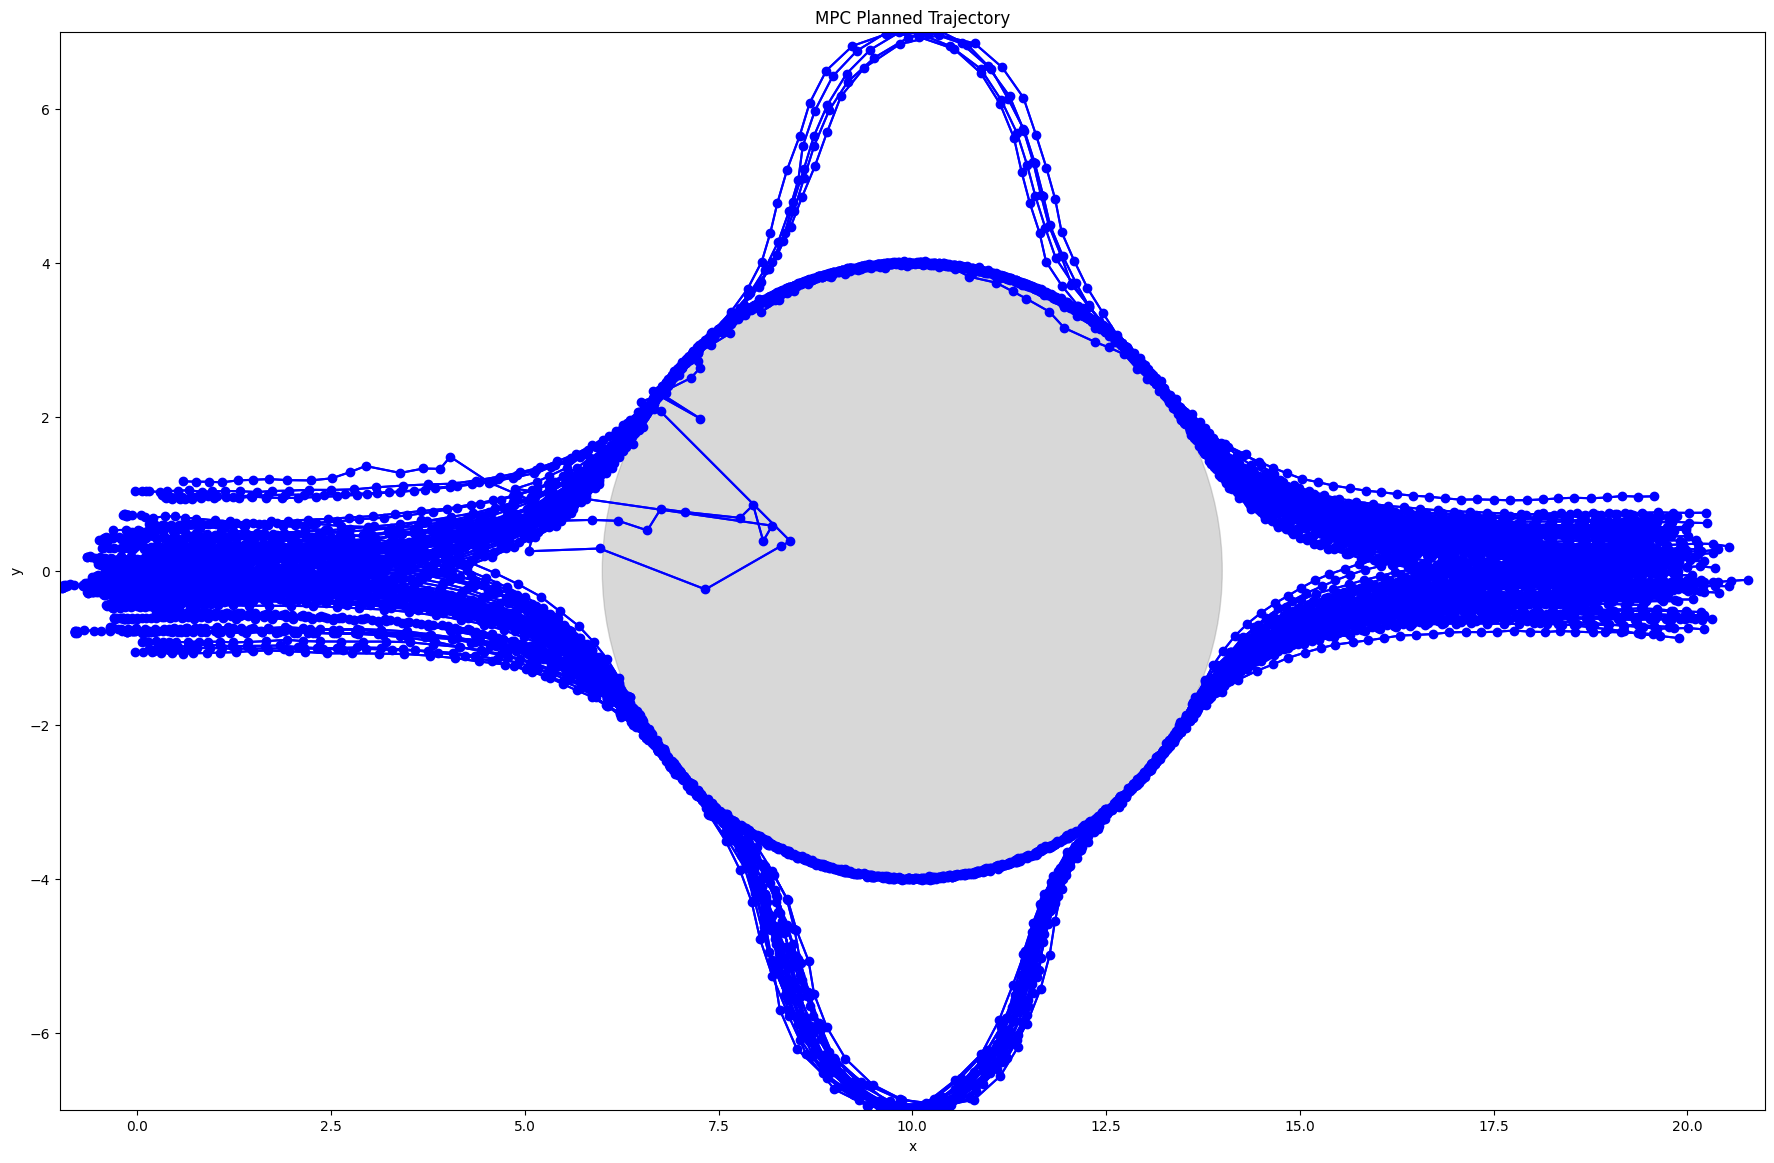

In [9]:
plt.figure(figsize=(22, 14))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("data/splice_mpc_trajs/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

In [10]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99)

np.int64(61)